In [270]:
# Preprocessing :Correct the data in the "height" column by replacing it with random numbers between 150 and 180. Ensure data consistency and integrity before proceeding with analysis. 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read data set
df = pd.read_csv('abccompany.csv')
df

# Replace 'height' column with random values between 150 and 180
df['Height'] = np.random.randint(150,181,size =len(df))
df

# Ensure data consistency by checking for null values and duplicates
print("Null values per column:\n", df.isnull().sum())
print("\nDuplicate rows: ", df.duplicated().sum())

# Drop duplicates (if any)
df.drop_duplicates(inplace=True)

# Replace missing values in 'College' column with 'Unknown'
df['College'] = df['College'].fillna('Unknown')

# Replace missing values in 'Salary' column with the median salary
df['Salary'] = df['Salary'].fillna(median_salary)
print(df)

Null values per column:
 Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64

Duplicate rows:  0
              Name            Team  Number Position  Age  Height  Weight  \
0    Avery Bradley  Boston Celtics       0       PG   25     159     180   
1      Jae Crowder  Boston Celtics      99       SF   25     180     235   
2     John Holland  Boston Celtics      30       SG   27     154     205   
3      R.J. Hunter  Boston Celtics      28       SG   22     164     185   
4    Jonas Jerebko  Boston Celtics       8       PF   29     160     231   
..             ...             ...     ...      ...  ...     ...     ...   
453   Shelvin Mack       Utah Jazz       8       PG   26     158     203   
454      Raul Neto       Utah Jazz      25       PG   24     179     179   
455   Tibor Pleiss       Utah Jazz      21        C   26     151     256   
456    Jeff Withey       Utah Jazz      24     

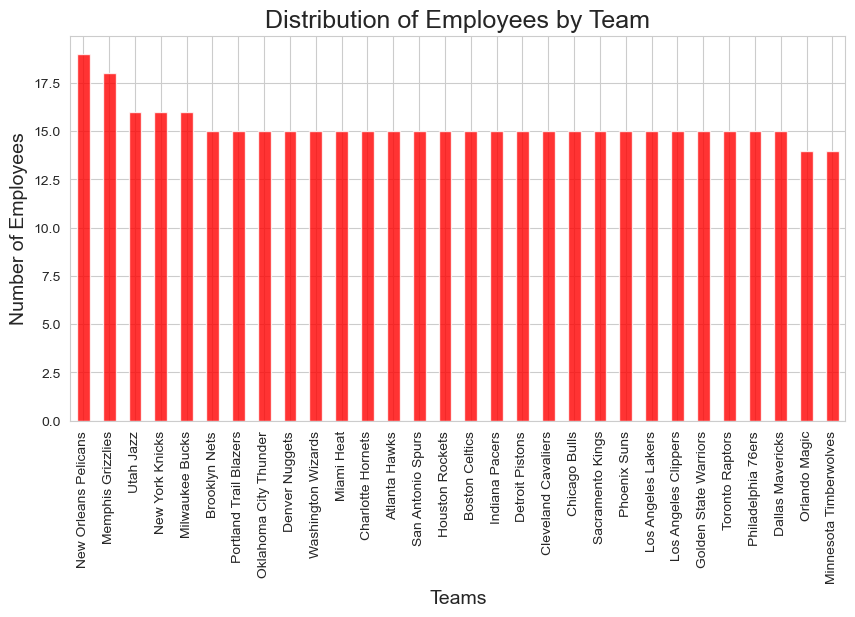

Team Distribution count:
 Team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
New York Knicks           16
Milwaukee Bucks           16
Brooklyn Nets             15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Denver Nuggets            15
Washington Wizards        15
Miami Heat                15
Charlotte Hornets         15
Atlanta Hawks             15
San Antonio Spurs         15
Houston Rockets           15
Boston Celtics            15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Sacramento Kings          15
Phoenix Suns              15
Los Angeles Lakers        15
Los Angeles Clippers      15
Golden State Warriors     15
Toronto Raptors           15
Philadelphia 76ers        15
Dallas Mavericks          15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64
Team Distribution (%):
 Team
New Orleans Pelicans      4.148472
Memphis G

In [258]:
# Analysis Tasks: 1. Determine the distribution of employees across each team and calculate the percentage split relative to the total number of employees.

# Calculate counts and percentages
team_distribution = df['Team'].value_counts()
team_distribution
team_percentage = (team_distribution/len(df))*100
team_percentage

# Visualisation
sns.set_style('whitegrid')
plt.figure(figsize =(10,5))
team_distribution.plot(kind='bar', color='red', alpha=0.8)
plt.title("Distribution of Employees by Team",fontsize =18)
plt.xlabel("Teams",fontsize =14)
plt.ylabel("Number of Employees",fontsize =14)
plt.show()
print("Team Distribution count:\n", team_distribution)
print("Team Distribution (%):\n", team_percentage)

position_distribution :
 Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64


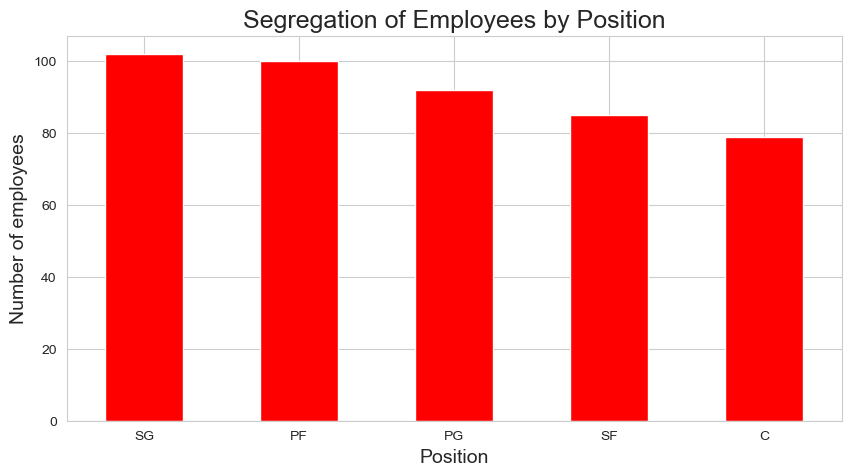

In [260]:
# Analysis Tasks:2. Segregate employees based on their positions within the company. 

# Segregation by position
position_distribution = df['Position'].value_counts()
print('position_distribution :\n',position_distribution)

# Visualisation
plt.figure(figsize=(10,5))
position_distribution.plot(kind='bar',color='red')
plt.title("Segregation of Employees by Position",fontsize =18)
plt.xlabel("Position",fontsize =14)
plt.ylabel("Number of employees",fontsize =14)
plt.xticks(fontsize =10,rotation=0)
plt.show()

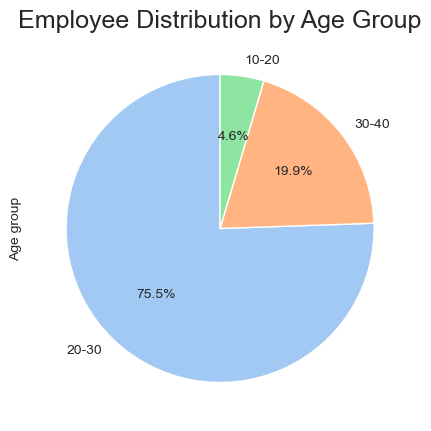

Age Group Distribution:
 age_group
20-30    346
30-40     91
10-20     21
40-50      0
50-60      0
Name: count, dtype: int64
Predominant Age Group: 20-30 with 346 employees


In [262]:
# Analysis Tasks: 3. Identify the predominant age group among employees.

# Group age into bins 
df['age_group'] = pd.cut(df['Age'], bins=[10,20, 30, 40, 50, 60], labels=["10-20","20-30", "30-40", "40-50", "50-60"])
age_group_distribution = df['age_group'].value_counts()

# Filter out zero count age groups
age_group_distribution_filtered = age_group_distribution[age_group_distribution > 0]

# Visualisation
plt.figure(figsize =(10,5))
age_group_distribution_filtered.plot(kind='pie',
                            autopct='%1.1f%%',
                            colors=sns.color_palette('pastel'),startangle=90
                           )
plt.title("Employee Distribution by Age Group",fontsize = 18)
plt.ylabel("Age group")
plt.show()

# Print predominant age group among employees.
predominant_age_group = age_group_distribution.idxmax()
predominant_age_group_count = age_group_distribution.max()
print("Age Group Distribution:\n", age_group_distribution)
print(f"Predominant Age Group: {predominant_age_group} with {predominant_age_group_count} employees")


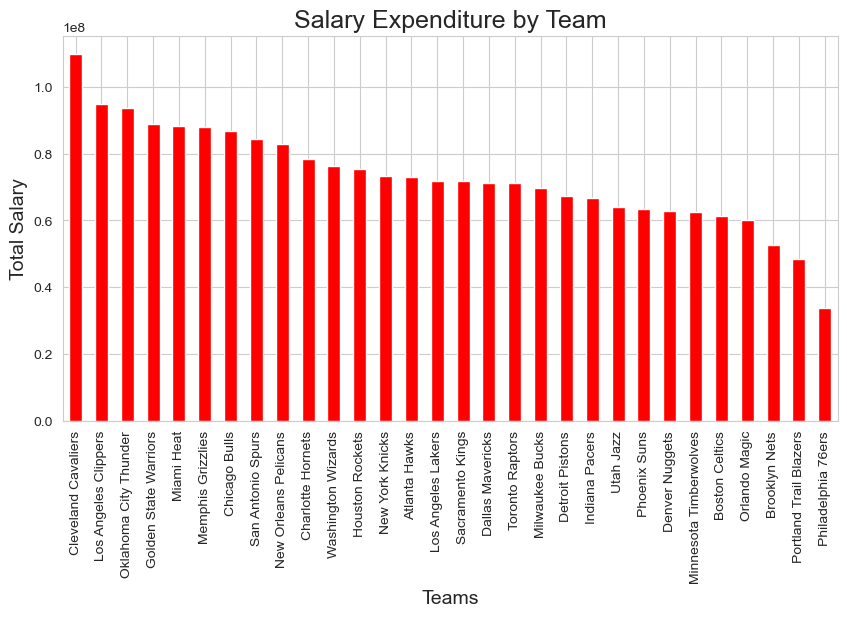

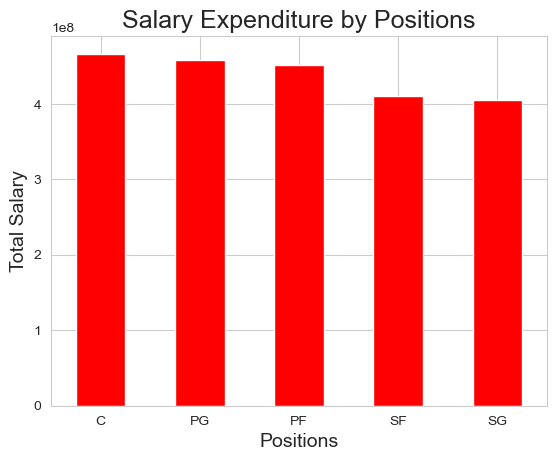

Team with highest salary expenditure:
 Team
Cleveland Cavaliers    109824875.0
Name: Salary, dtype: float64
Position with highest salary expenditure:
 Position
C    466377332.0
Name: Salary, dtype: float64


In [264]:
# Analysis Tasks: 4. Discover which team and position have the highest salary expenditure.

# Group by team and position, summing salary
team_salary = df.groupby('Team')['Salary'].sum().sort_values(ascending=False)
position_salary = df.groupby('Position')['Salary'].sum().sort_values(ascending=False)

# Visualisation
plt.figure(figsize=(10,5))
team_salary.plot(kind = 'bar',color ='red')
plt.title("Salary Expenditure by Team",fontsize = 18)
plt.xlabel("Teams",fontsize = 14)
plt.ylabel("Total Salary",fontsize = 14)
plt.show()

position_salary.plot(kind = 'bar',color ='red')
plt.title("Salary Expenditure by Positions",fontsize = 18)
plt.xlabel("Positions",fontsize = 14)
plt.ylabel("Total Salary",fontsize = 14)
plt.xticks(rotation=0)
plt.show()

print("Team with highest salary expenditure:\n", team_salary.head(1))
print("Position with highest salary expenditure:\n", position_salary.head(1))


Correlation between Age and Salary:
              Age    Salary
Age     1.000000  0.209124
Salary  0.209124  1.000000


Text(0.5, 1.0, 'Correlation Between Age and Salary')

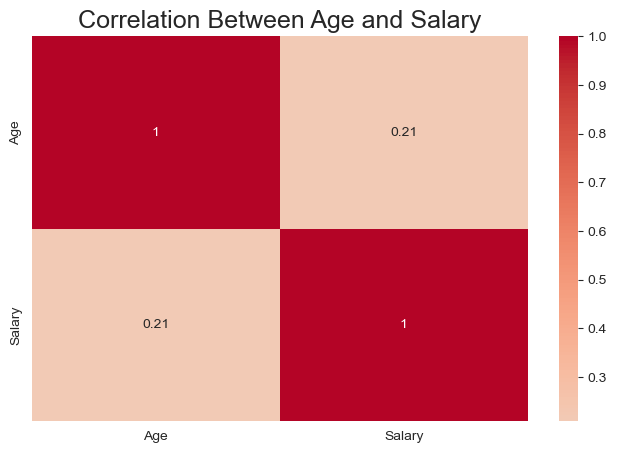

In [266]:
# Analysis Tasks: 5. Investigate if there's any correlation between age and salary, and represent it visually.

# correlation analysis
correlation = df[['Age','Salary']].corr()
print("Correlation between Age and Salary:\n", correlation)

# Visualization using heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Between Age and Salary",fontsize = 18)


